[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\39346\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


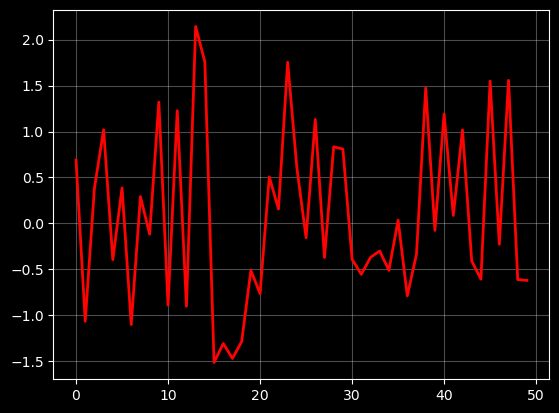

In [47]:
# This small project will use the Amazon Fine Food Reviews DataSet:
# https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?resource=download


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#setting up a stylesheet for plt
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 
plt.style.use('dark_background')
data= np.random.randn(50)
plt.plot(data, color= "#ff0303" , linewidth=2)
plt.grid(True, color="w" , alpha=0.3)

import nltk
nltk.download('punkt')
nltk.data.path.append(r'C:\Users\39346\AppData\Roaming\nltk_data')



In [48]:
df = pd.read_csv('Reviews.csv')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [49]:
# for the sake of this project the text and score are the most important variables

In [50]:
print(df.shape)

(568454, 10)


In [51]:
# This dataset is quite large... hence we are going to use only the first thousand rows

df = df.head(1000)
print(df.shape)

(1000, 10)


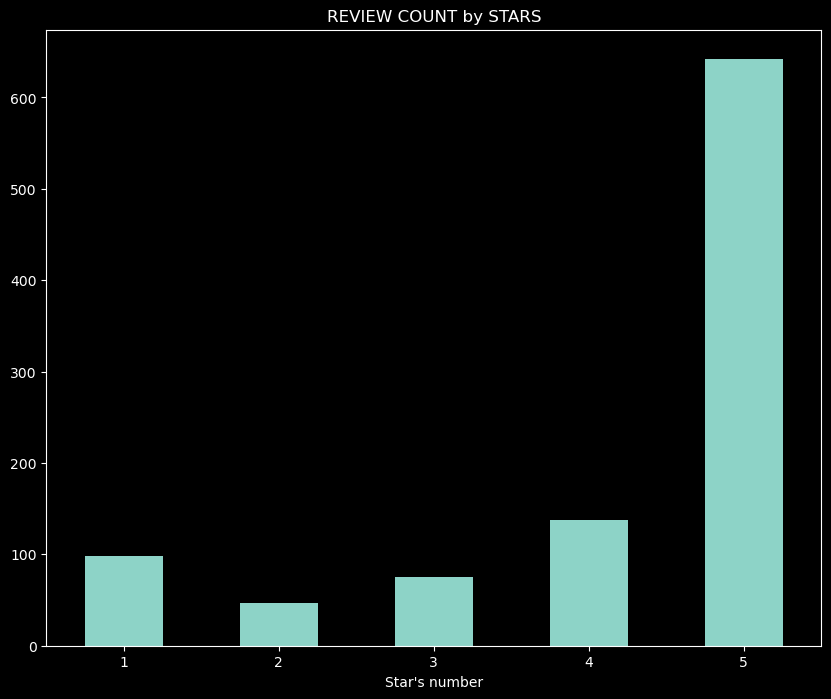

In [52]:
# we'll now move to some Data exploration keeping a focus on the score aka stars

ax=df['Score'].value_counts().sort_index() \
                .plot(kind='bar',
                 title="REVIEW COUNT by STARS",
                 figsize=(10,8))
                
ax.set_xlabel("Star's number")
plt.xticks(rotation=0)
plt.show()

In [53]:
# the overall view show us a bias towards 5 stars reviews

In [54]:
# dipping our toes in NLTK

example = df['Text'][500]
print(example)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


In [55]:
#seems like a good review, let's see how NLTK can help us with this

import nltk
nltk.data.path.clear()
nltk.data.path.append(r'C:\Users\39346\AppData\Roaming\nltk_data')
 
# NLTK has other plans running "nltk.download()" and downloading all packages see if it resolve the lookup error issue with Jupiter Notebook
# Restarting the kernel dind't work, so I had to download the packages manually

# Restart Kernel and run the code again

# If it still doesn't work reboot the OS


In [56]:
nltk.word_tokenize(example)

['I',
 'bought',
 'these',
 'for',
 'the',
 'office',
 'and',
 'no',
 'one',
 'can',
 'put',
 'them',
 'down',
 '.',
 'I',
 "'m",
 'ordering',
 'more',
 'today',
 'and',
 'it',
 'has',
 'only',
 'been',
 '2',
 'weeks',
 '.',
 'Did',
 "n't",
 'have',
 'to',
 'shop',
 'for',
 'them',
 'either',
 ',',
 'Amazon',
 'brought',
 'it',
 'to',
 'my',
 'door',
 '!']

In [57]:
# Tokeinzing is the process of breaking down a text into smaller components,

tokens = nltk.word_tokenize(example)

# NLTK can attribute a part of speech to each token, this is called POS tagging

nltk.pos_tag(tokens)


[('I', 'PRP'),
 ('bought', 'VBD'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('office', 'NN'),
 ('and', 'CC'),
 ('no', 'DT'),
 ('one', 'NN'),
 ('can', 'MD'),
 ('put', 'VB'),
 ('them', 'PRP'),
 ('down', 'RP'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('ordering', 'VBG'),
 ('more', 'JJR'),
 ('today', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('has', 'VBZ'),
 ('only', 'RB'),
 ('been', 'VBN'),
 ('2', 'CD'),
 ('weeks', 'NNS'),
 ('.', '.'),
 ('Did', 'VBP'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('to', 'TO'),
 ('shop', 'VB'),
 ('for', 'IN'),
 ('them', 'PRP'),
 ('either', 'DT'),
 (',', ','),
 ('Amazon', 'NNP'),
 ('brought', 'VBD'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('door', 'NN'),
 ('!', '.')]

In [58]:
# Next we'll get into VADER, a tool capable of giving us a sentiment score
#  for each of the previously defined tokens (it can be Positive, Negative or Neutral)

from nltk.sentiment import SentimentIntensityAnalyzer

from tqdm.notebook import tqdm   ## tqdm is a library that allows us to create progress bars in Python

sia = SentimentIntensityAnalyzer()

In [59]:
sia.polarity_scores('I absolutely adore when I get scammed by a company, it makes me feel so good!')

{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.8371}

In [60]:
# As you've just witnessed, the VADER tool is capable of giving us a sentiment score for each token 
# Yet it's not capable of deciphering the context of the sentence, nor the relationship between the words.
# Hence the sentiment score is not very accurate in this case. 
# Vader gives us a score between -1 and 1, where -1 is negative, 0 is neutral and 1 is positive.

In [61]:
print(example)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


In [62]:
sia.polarity_scores(example)
# (Not the best example)

{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [63]:
# Now we want to run Vader on our dataset "Text" Column and grab the polarity scores 
# for each review in the dataset (1000 rows)

# We can achieve this with a loop

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):

    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [64]:
vaders = pd.DataFrame(res).T # Transposing the DataFrame to have the Id as index and the scores as columns

vaders = vaders.reset_index().rename(columns={'index': 'Id'}) # Adding Id to combine it with our DF

vaders = vaders.merge(df, how='left') #


In [65]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


C:\Users\39346\AppData\Local\Temp\ipykernel_19568\151320396.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Score', y='compound', data=vaders, palette='coolwarm')


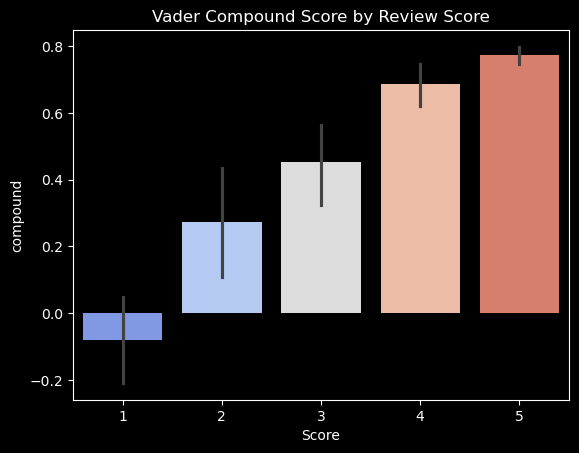

In [66]:
# We are now going to use sns to ccreate a bar plot to showcase the relation between 
# score and the vader compound score

ax = sns.barplot(x='Score', y='compound', data=vaders, palette='coolwarm')

ax.set_title('Vader Compound Score by Review Score')
plt.show()

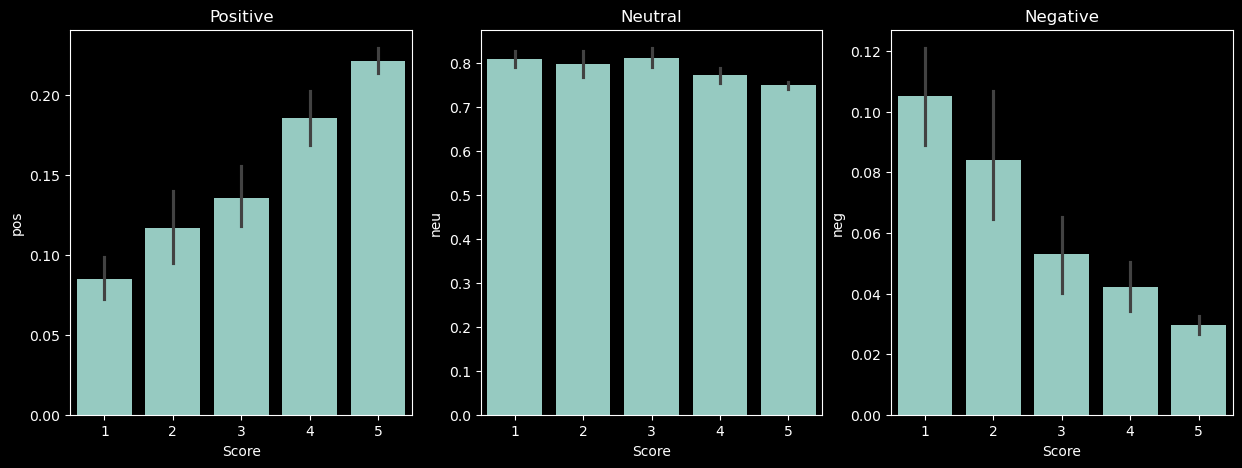

In [70]:
# We are now going to crete a graph for each compound score related to the review score

fig,axs = plt.subplots(1,3, figsize=(15,5))

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive') 
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()